Saved: C:\Users\QiYangWong\Downloads\Amcorp Pic\Pred_Est_Added_weekdays.png


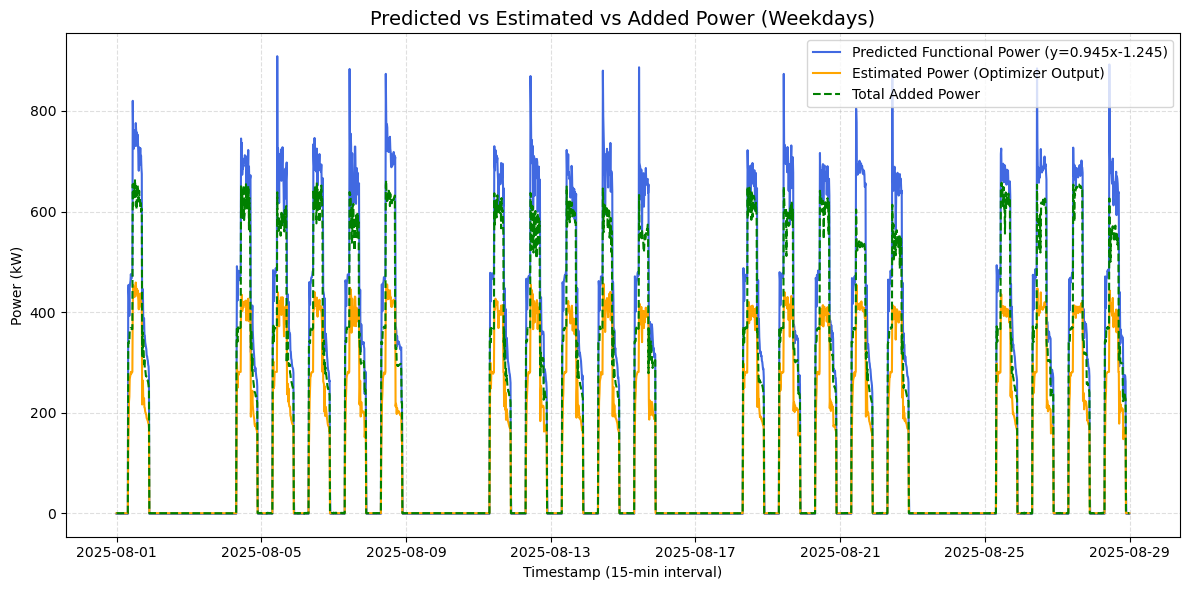

Saved: C:\Users\QiYangWong\Downloads\Amcorp Pic\Pred_Est_Added_weekends.png


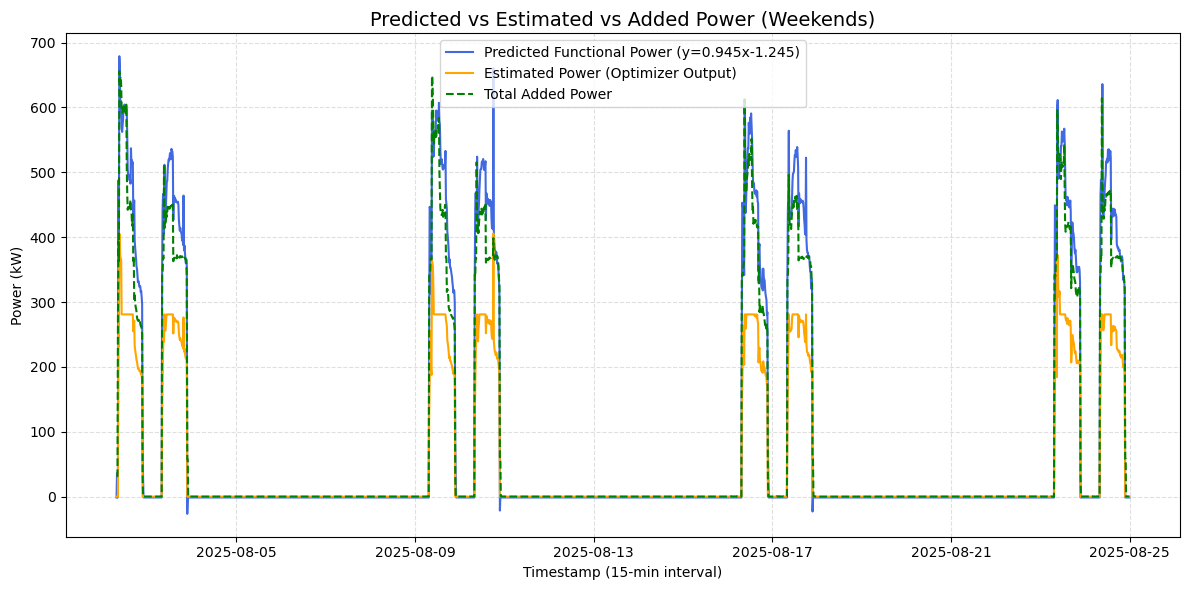

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = r"C:\Users\QiYangWong\Downloads\Total Power Estimated vs Functional Power.csv"
save_folder = r"C:\Users\QiYangWong\Downloads\Amcorp Pic"
os.makedirs(save_folder, exist_ok=True)

df = pd.read_csv(file_path, low_memory=False)
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.dropna(subset=["timestamp"]).set_index("timestamp").sort_index()

df = df.rename(columns={
    "Formula plugged in 0.945x + -1.245": "Predicted_kW",
    "total_power_kW_est": "Estimated_kW",
    "demand_RTon": "RT_Load",
    "TotalAddedPower": "TotalAddedPower"
})

df_weekdays = df[df.index.weekday < 5]
df_weekends = df[df.index.weekday >= 5]

def plot_kw_comparison(sub_df, title_label, save_name):
    plt.figure(figsize=(12,6))
    plt.plot(sub_df.index, sub_df["Predicted_kW"], label="Predicted Functional Power (y=0.945x-1.245)", color="royalblue", linewidth=1.5)
    plt.plot(sub_df.index, sub_df["Estimated_kW"], label="Estimated Power (Optimizer Output)", color="orange", linewidth=1.5)
    
    if "TotalAddedPower" in sub_df.columns:
        plt.plot(sub_df.index, sub_df["TotalAddedPower"], label="Total Added Power", color="green", linewidth=1.5, linestyle="--")

    plt.title(f"Predicted vs Estimated vs Added Power ({title_label})", fontsize=14)
    plt.xlabel("Timestamp (15-min interval)")
    plt.ylabel("Power (kW)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()

    save_path = os.path.join(save_folder, f"Pred_Est_Added_{save_name}.png")
    plt.savefig(save_path, dpi=300, bbox_inches="tight", facecolor="white")
    print(f"Saved: {save_path}")
    plt.show()

plot_kw_comparison(df_weekdays, "Weekdays", "weekdays")
plot_kw_comparison(df_weekends, "Weekends", "weekends")
